In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('CO2_Emissions_Canada.csv')

In [3]:
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [6]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [7]:
data['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [8]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [9]:
# Check for duplicates
data.duplicated().sum()

1103

In [10]:
# Drop duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [11]:
# Check for missing values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# ----------------------------------------------------------------------------
# Eploratory Data Analysis

<AxesSubplot:ylabel='CO2 Emissions(g/km)'>

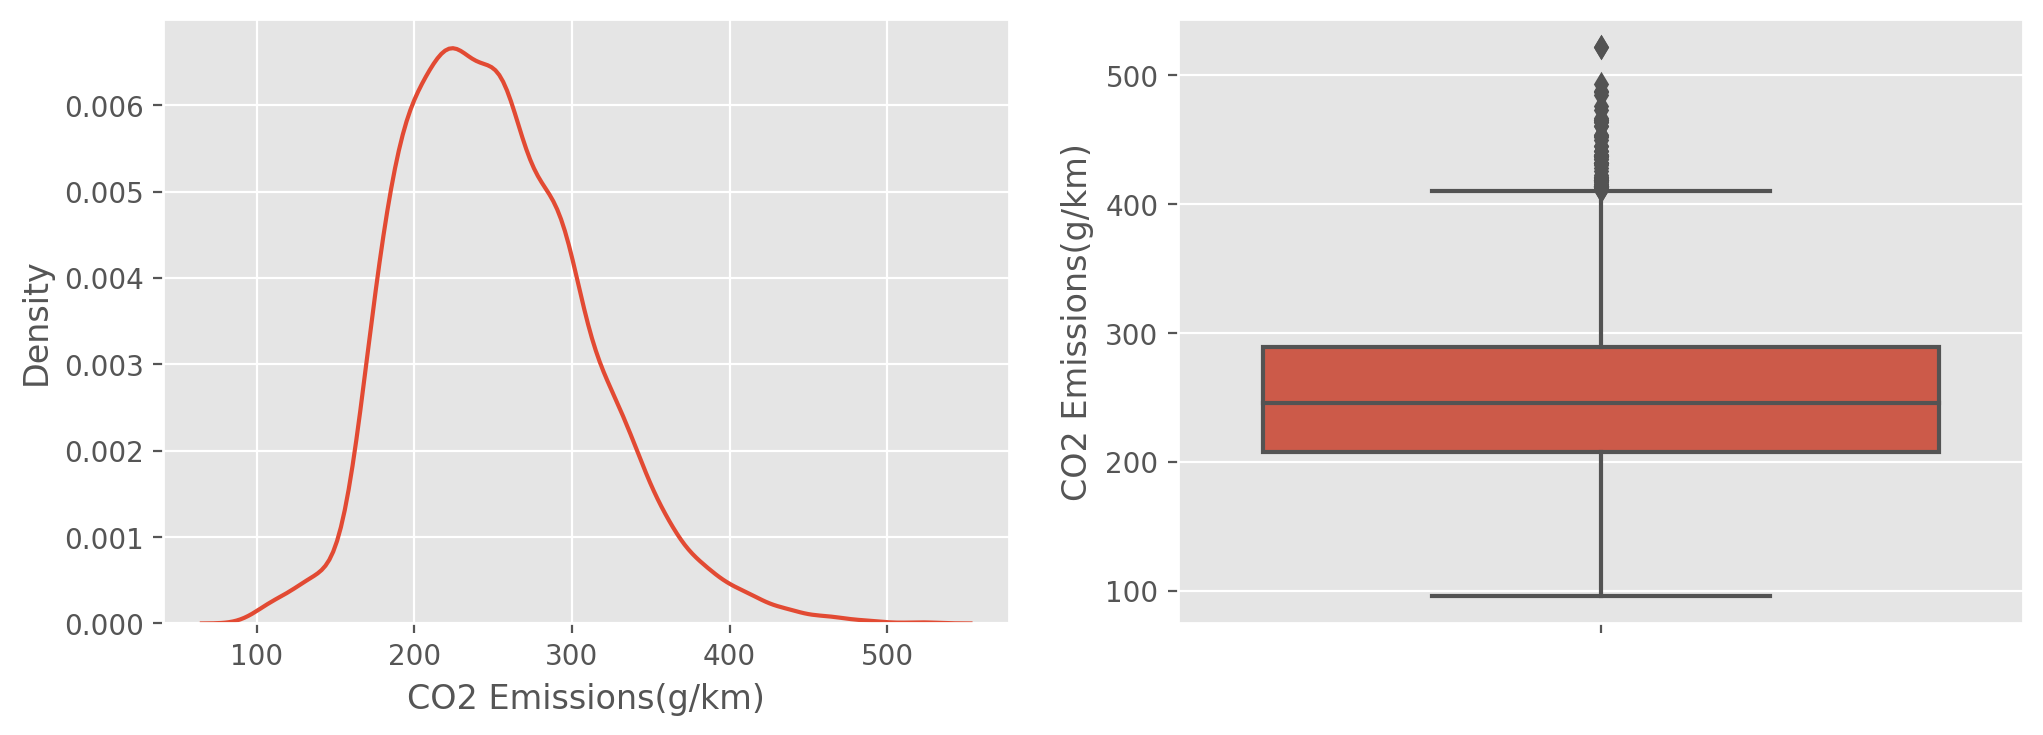

In [12]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data['CO2 Emissions(g/km)'], hist = False)

plt.subplot(1,2,2)
sns.boxplot(y = data['CO2 Emissions(g/km)'])

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

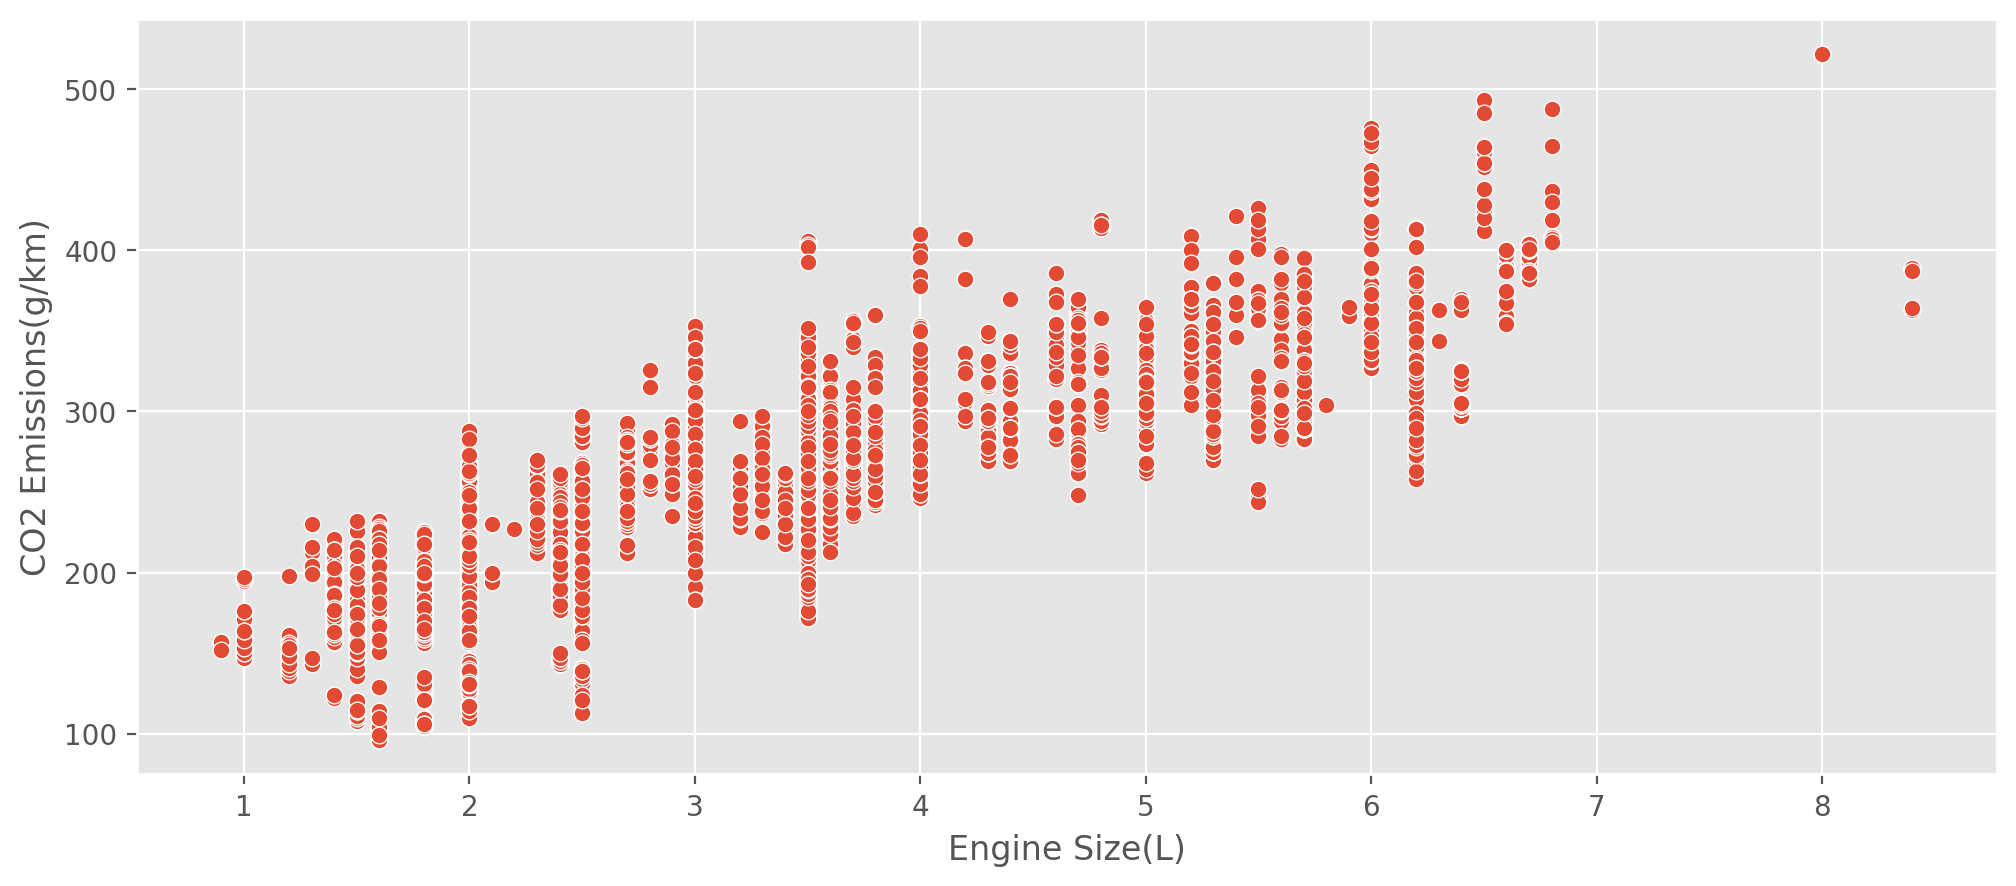

In [13]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

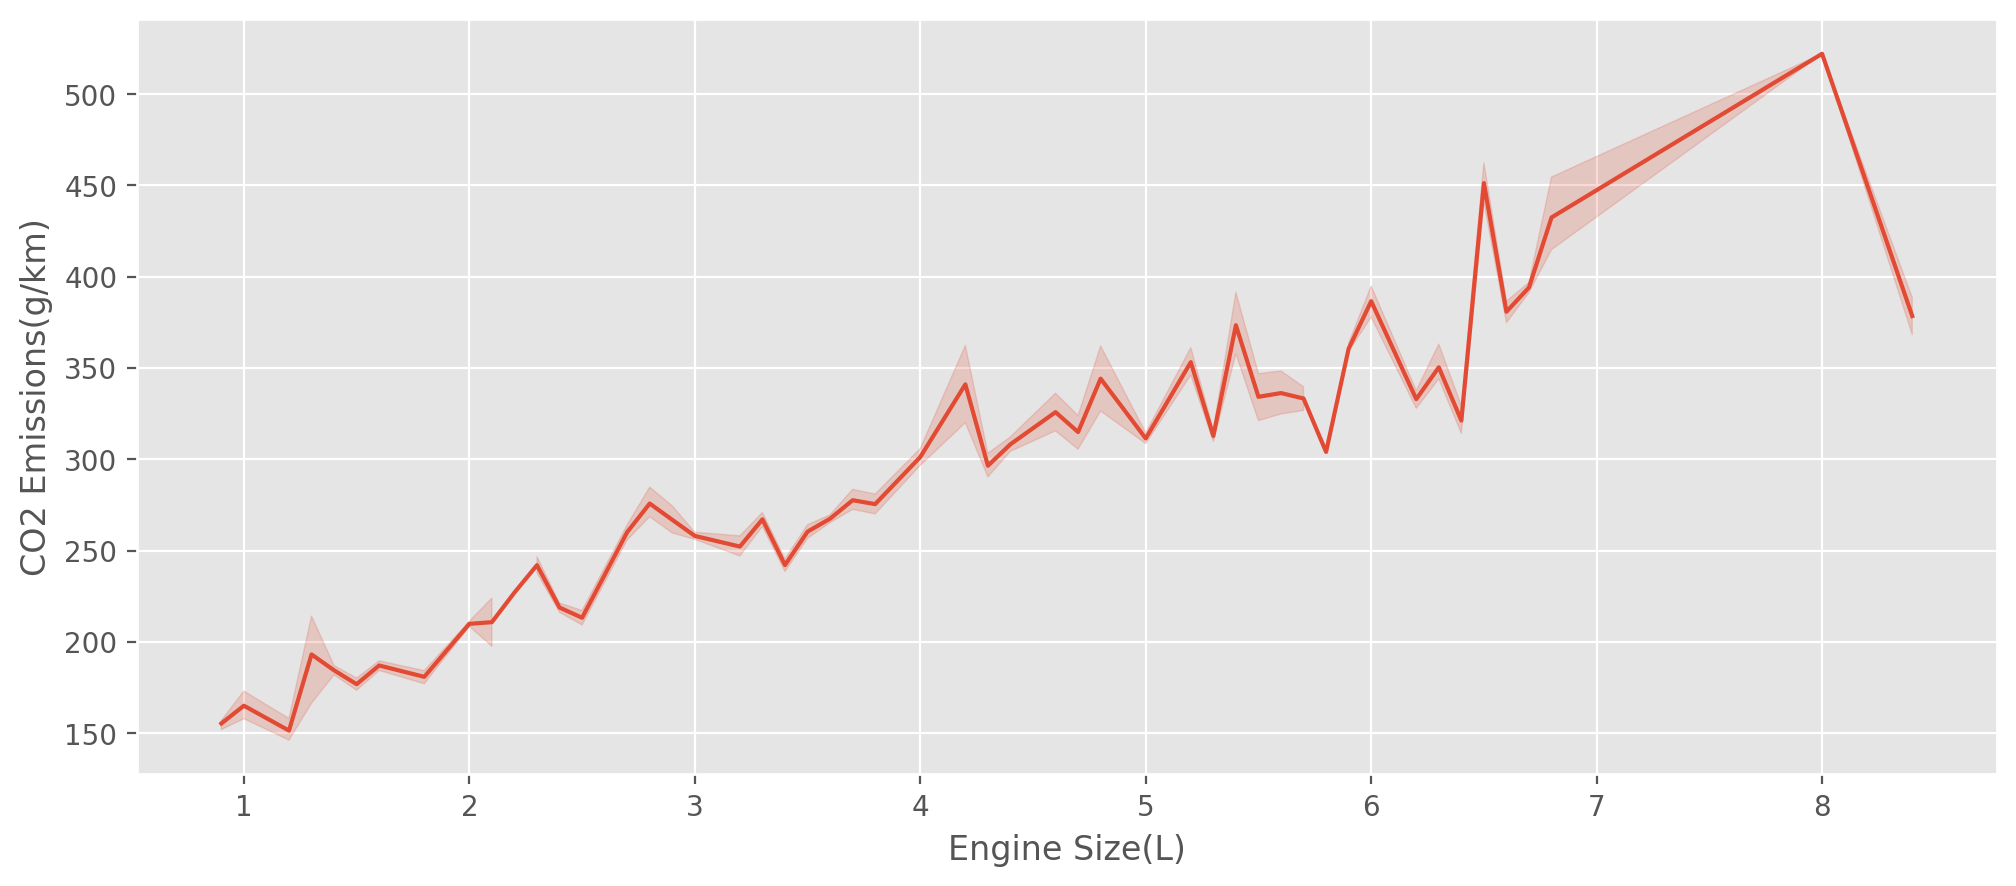

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

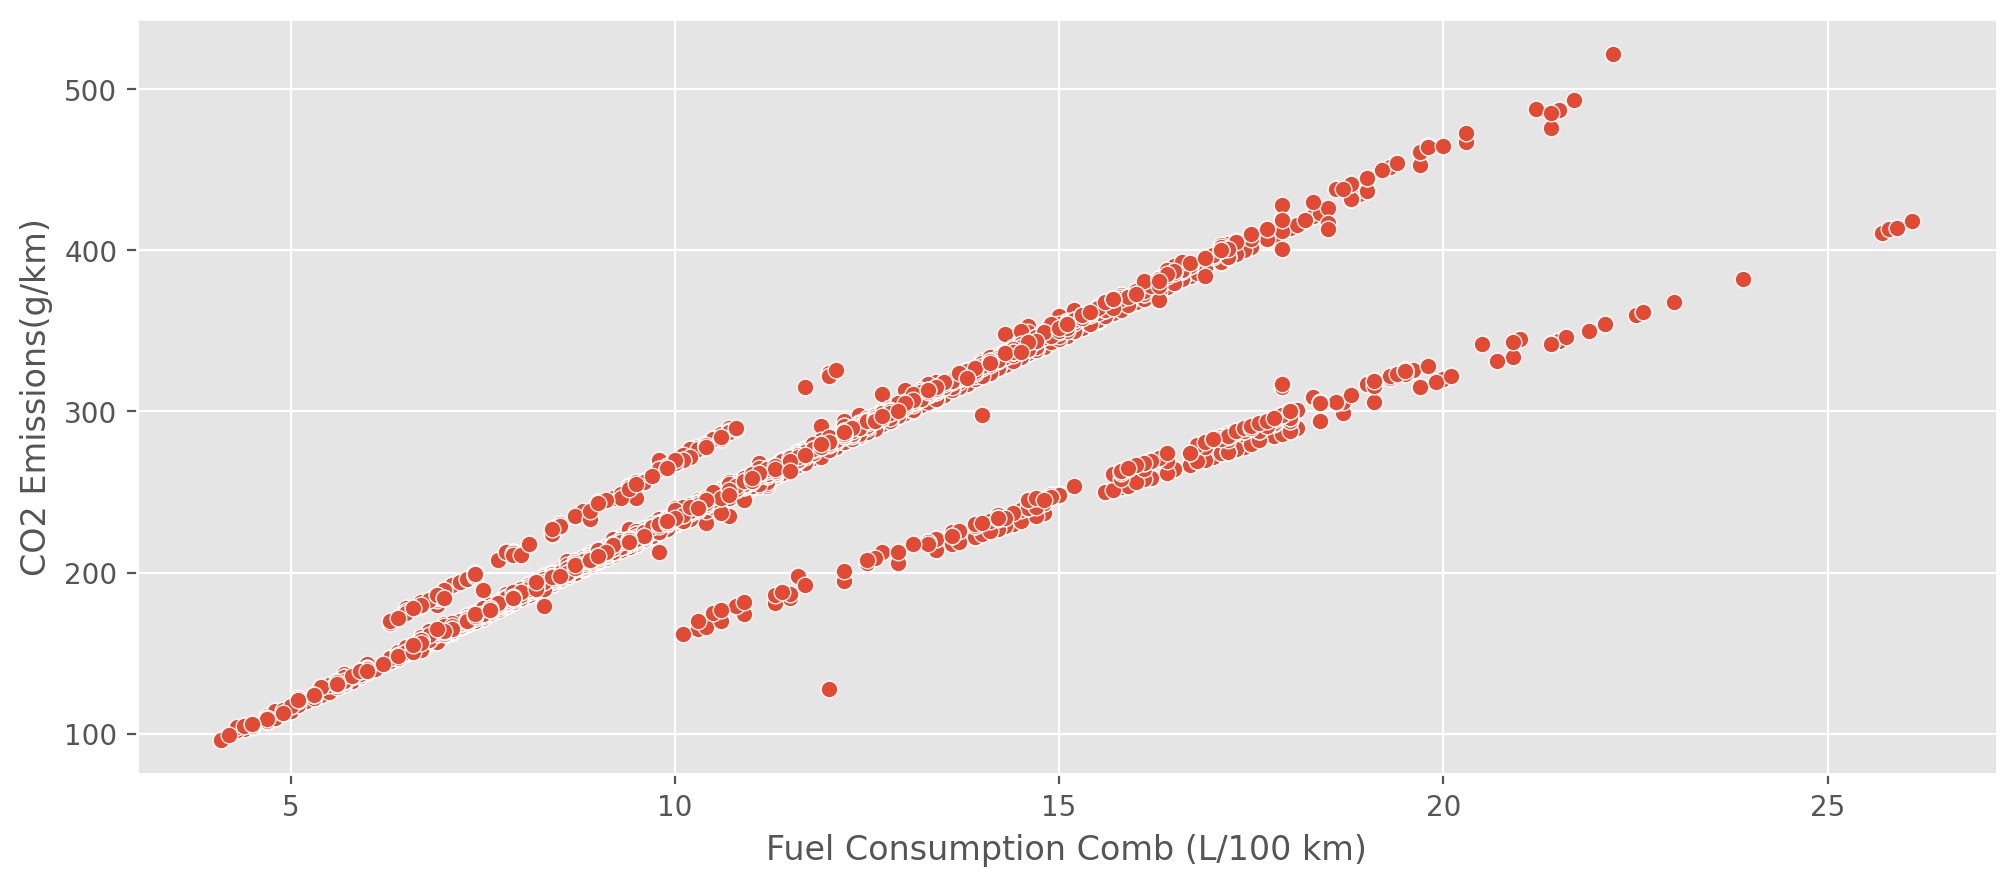

In [15]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

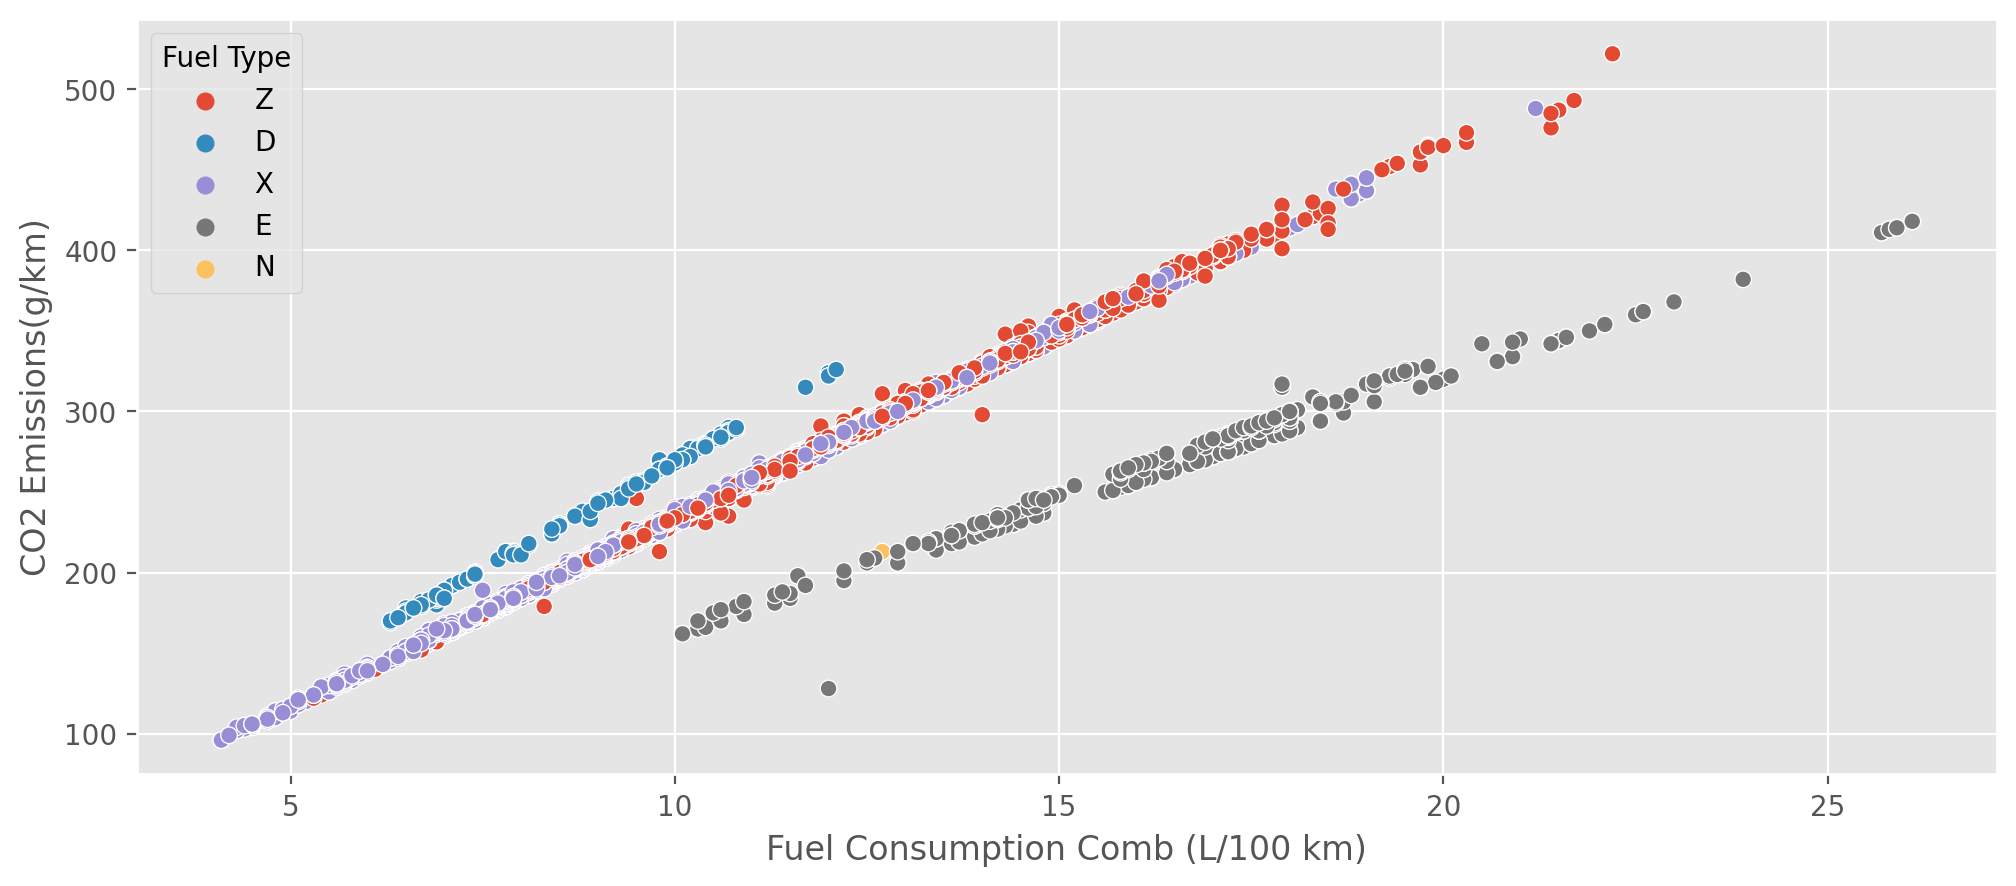

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

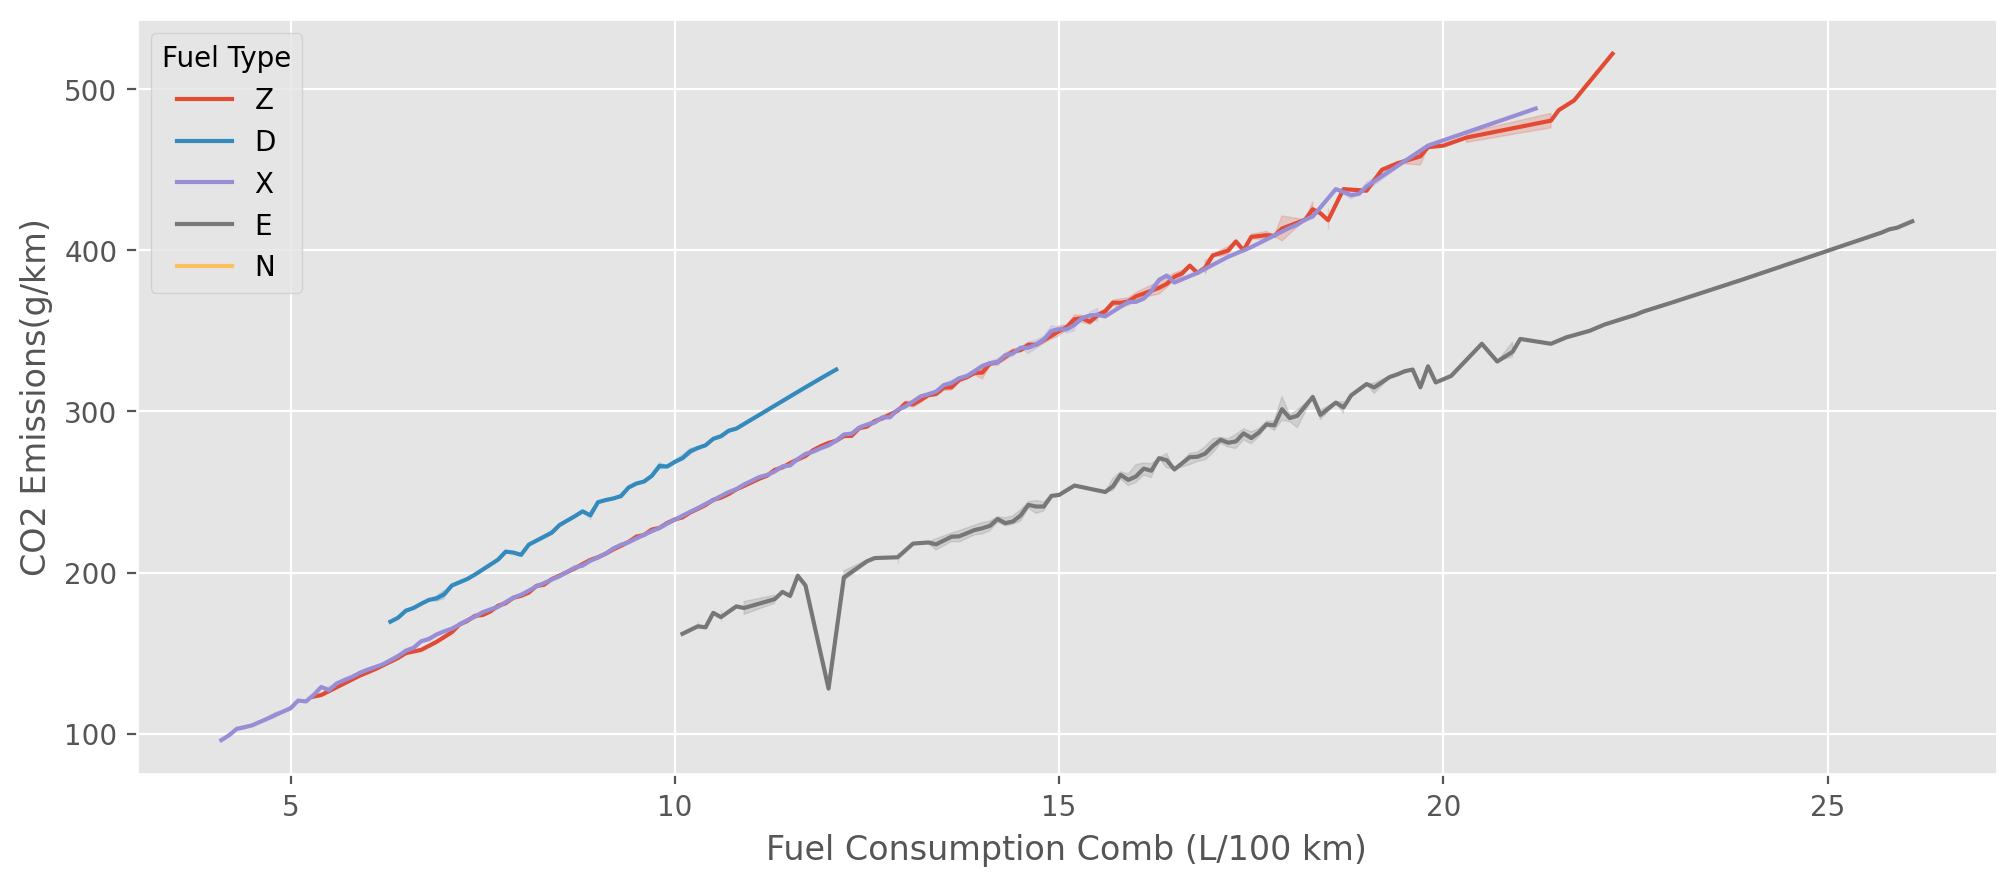

In [17]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = data)

<AxesSubplot:xlabel='Vehicle Class', ylabel='CO2 Emissions(g/km)'>

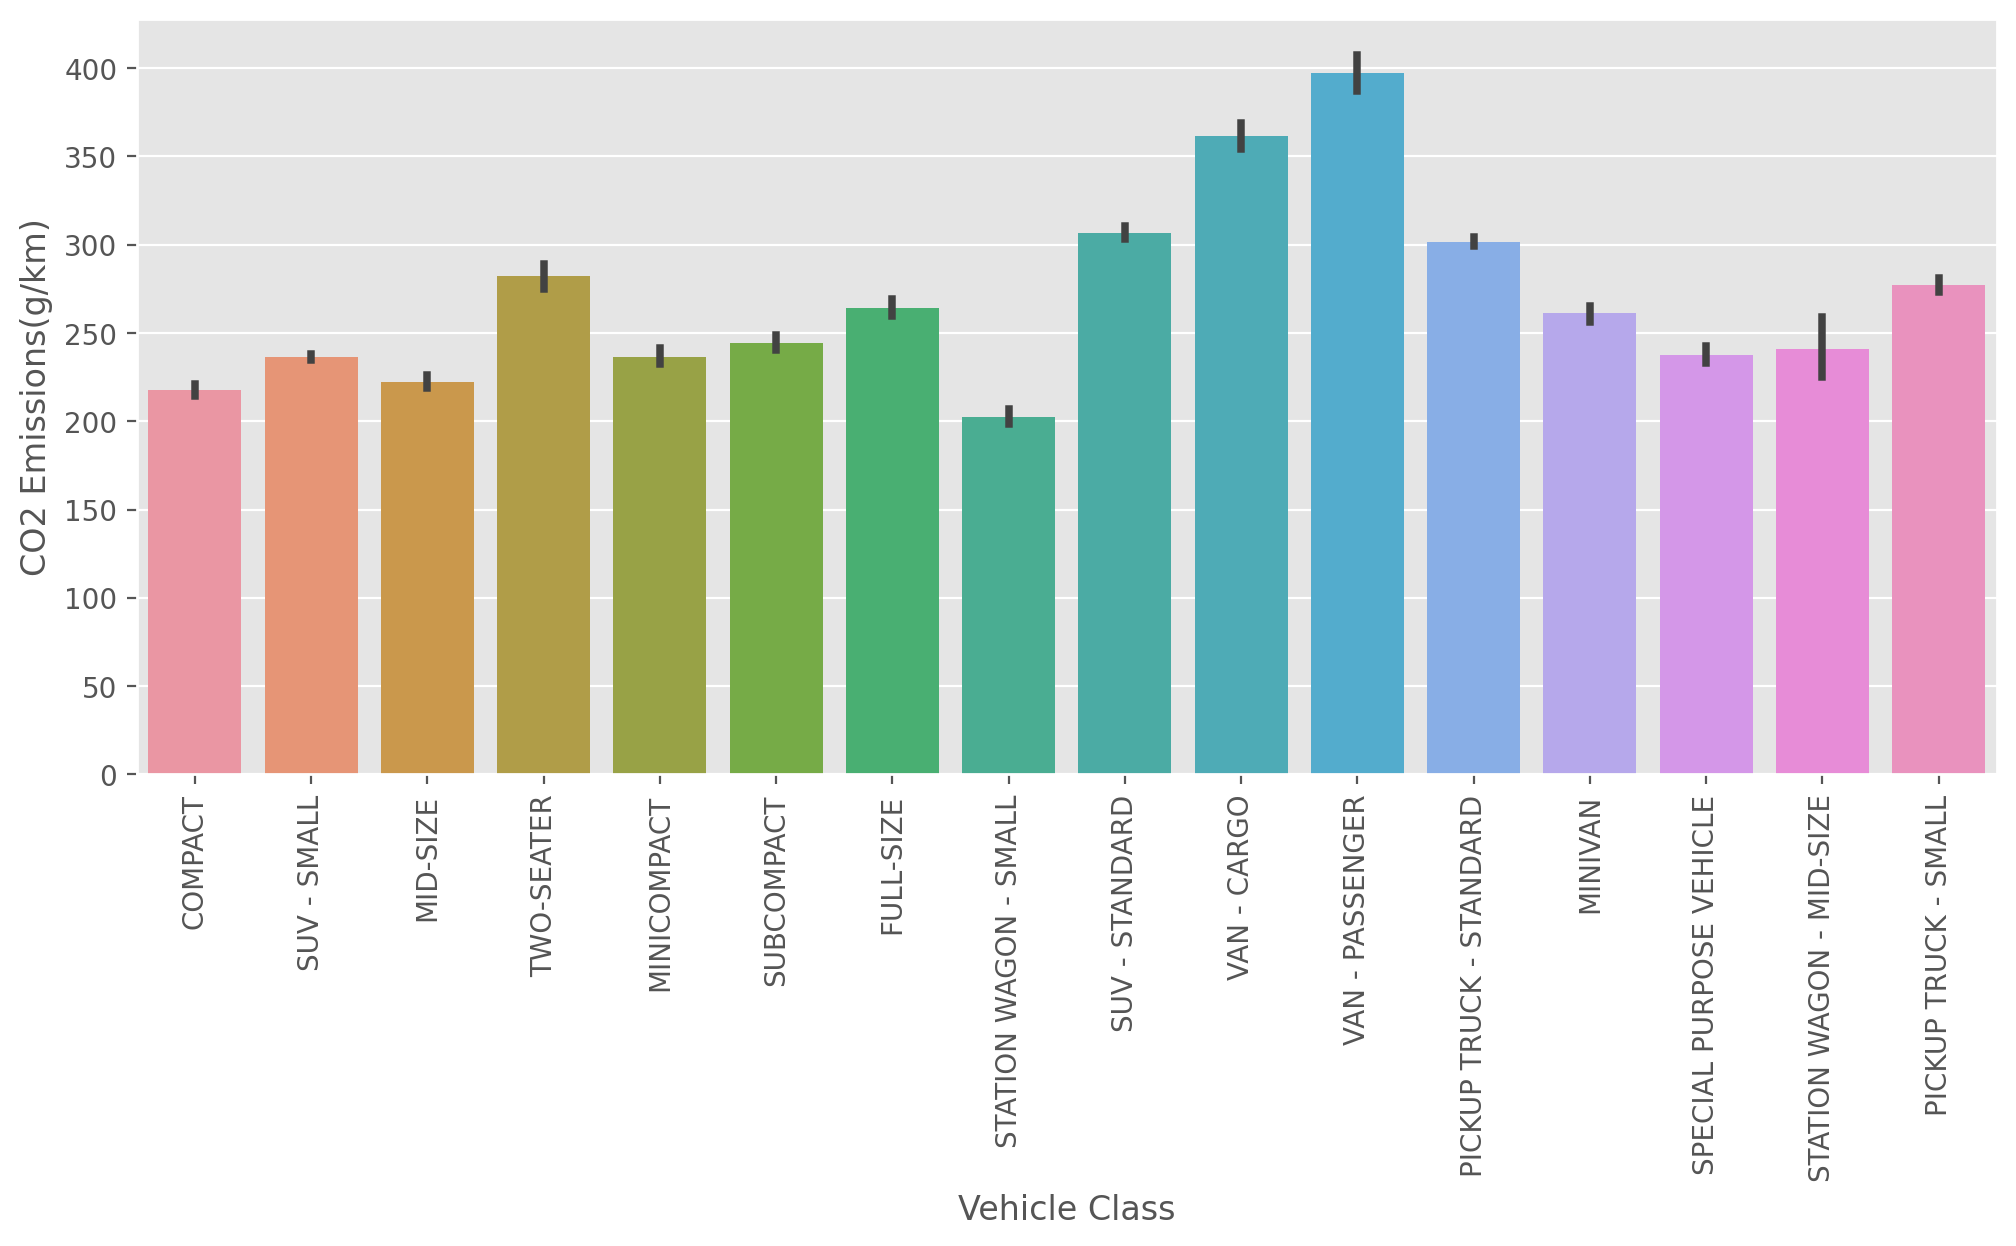

In [18]:
plt.figure(figsize = (12,5), dpi = 200)
plt.xticks(rotation = 90)
sns.barplot('Vehicle Class', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

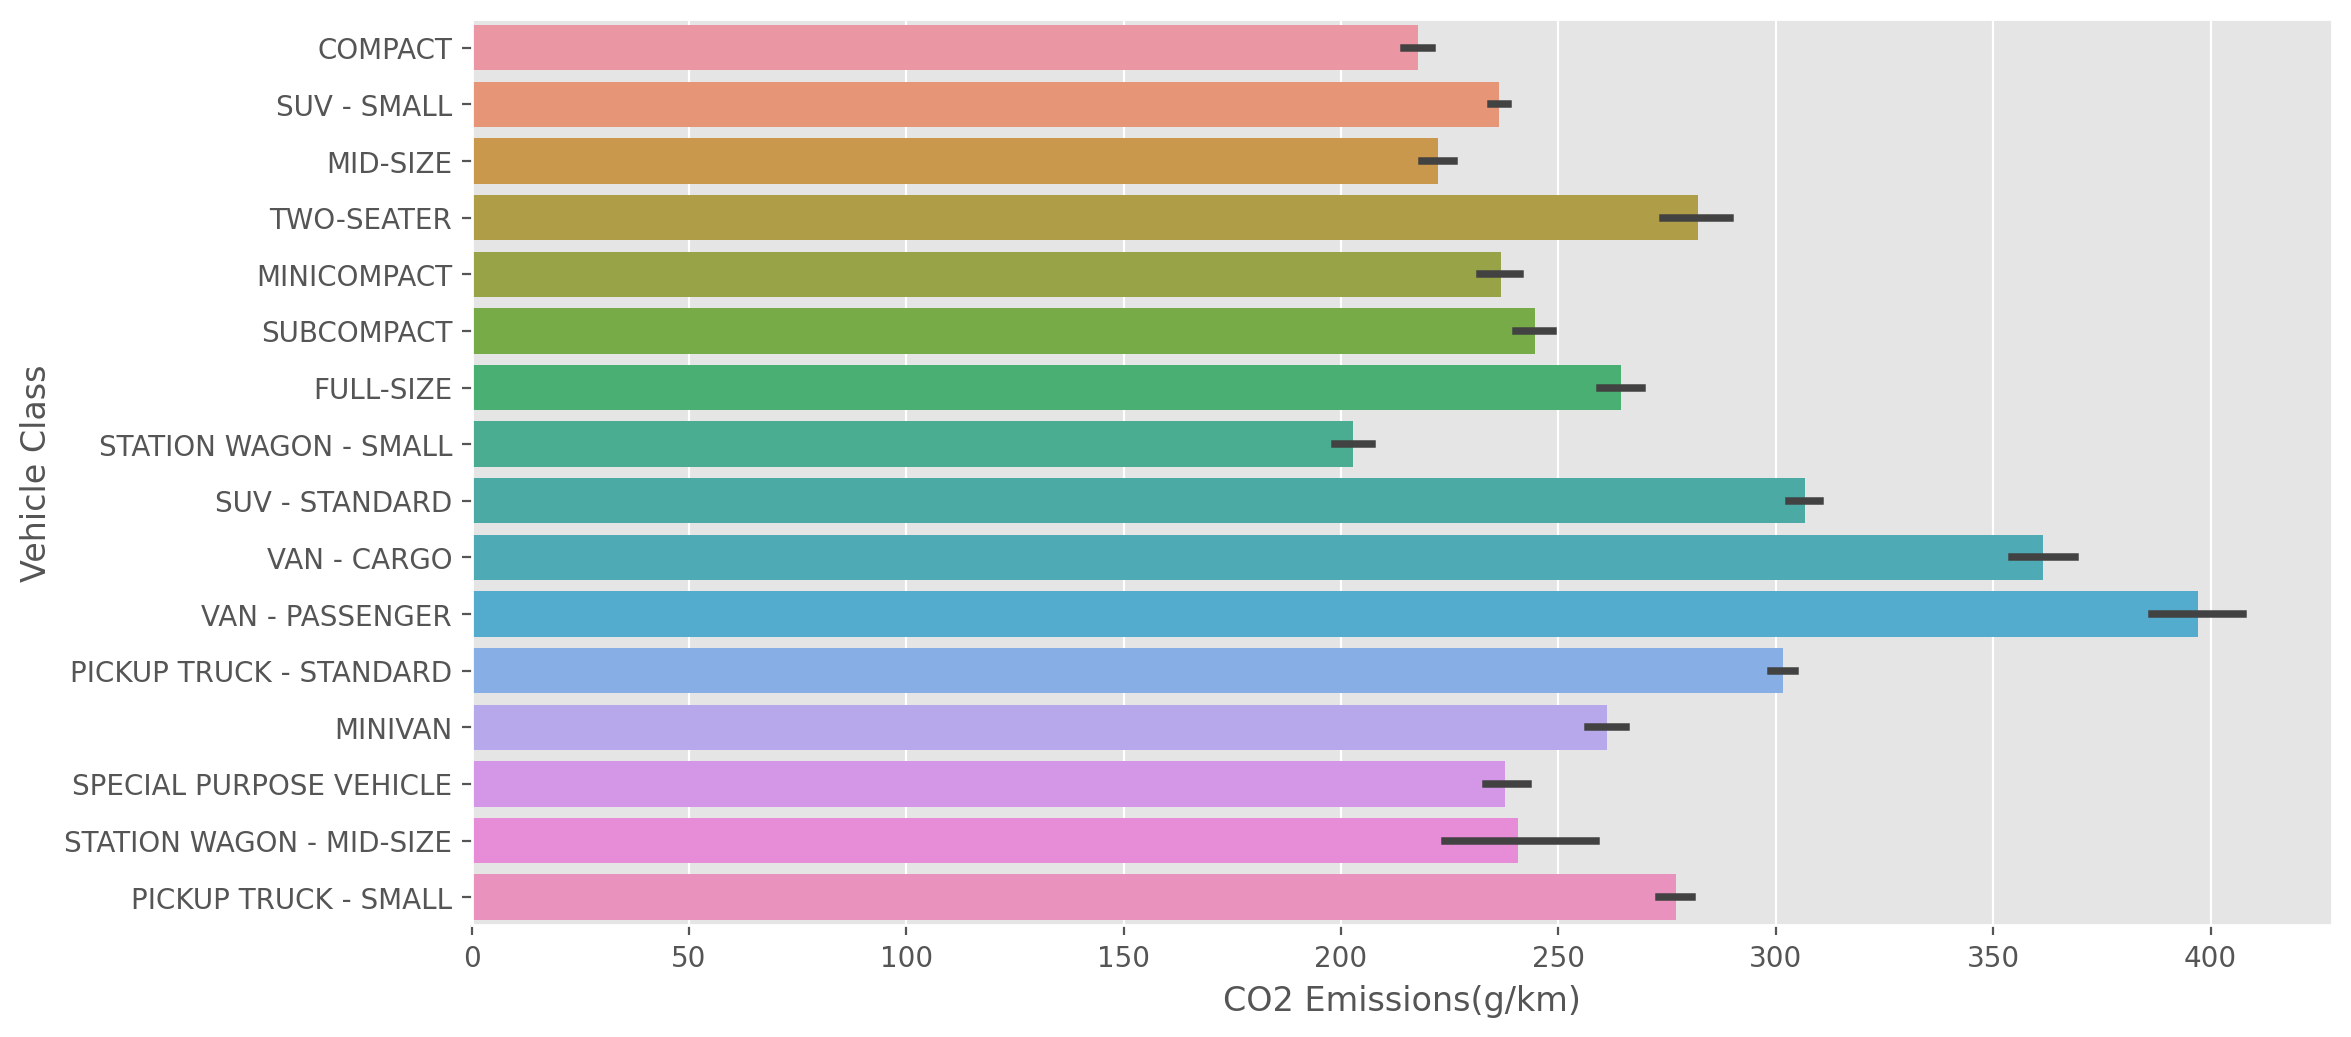

In [19]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data)

In [20]:
data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False)

Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              306.730832
PICKUP TRUCK - STANDARD     301.610526
TWO-SEATER                  282.086614
PICKUP TRUCK - SMALL        277.022556
FULL-SIZE                   264.407480
MINIVAN                     261.114754
SUBCOMPACT                  244.568480
STATION WAGON - MID-SIZE    240.755556
SPECIAL PURPOSE VEHICLE     237.815385
MINICOMPACT                 236.675182
SUV - SMALL                 236.413519
MID-SIZE                    222.292981
COMPACT                     217.641196
STATION WAGON - SMALL       202.686916
Name: CO2 Emissions(g/km), dtype: float64

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

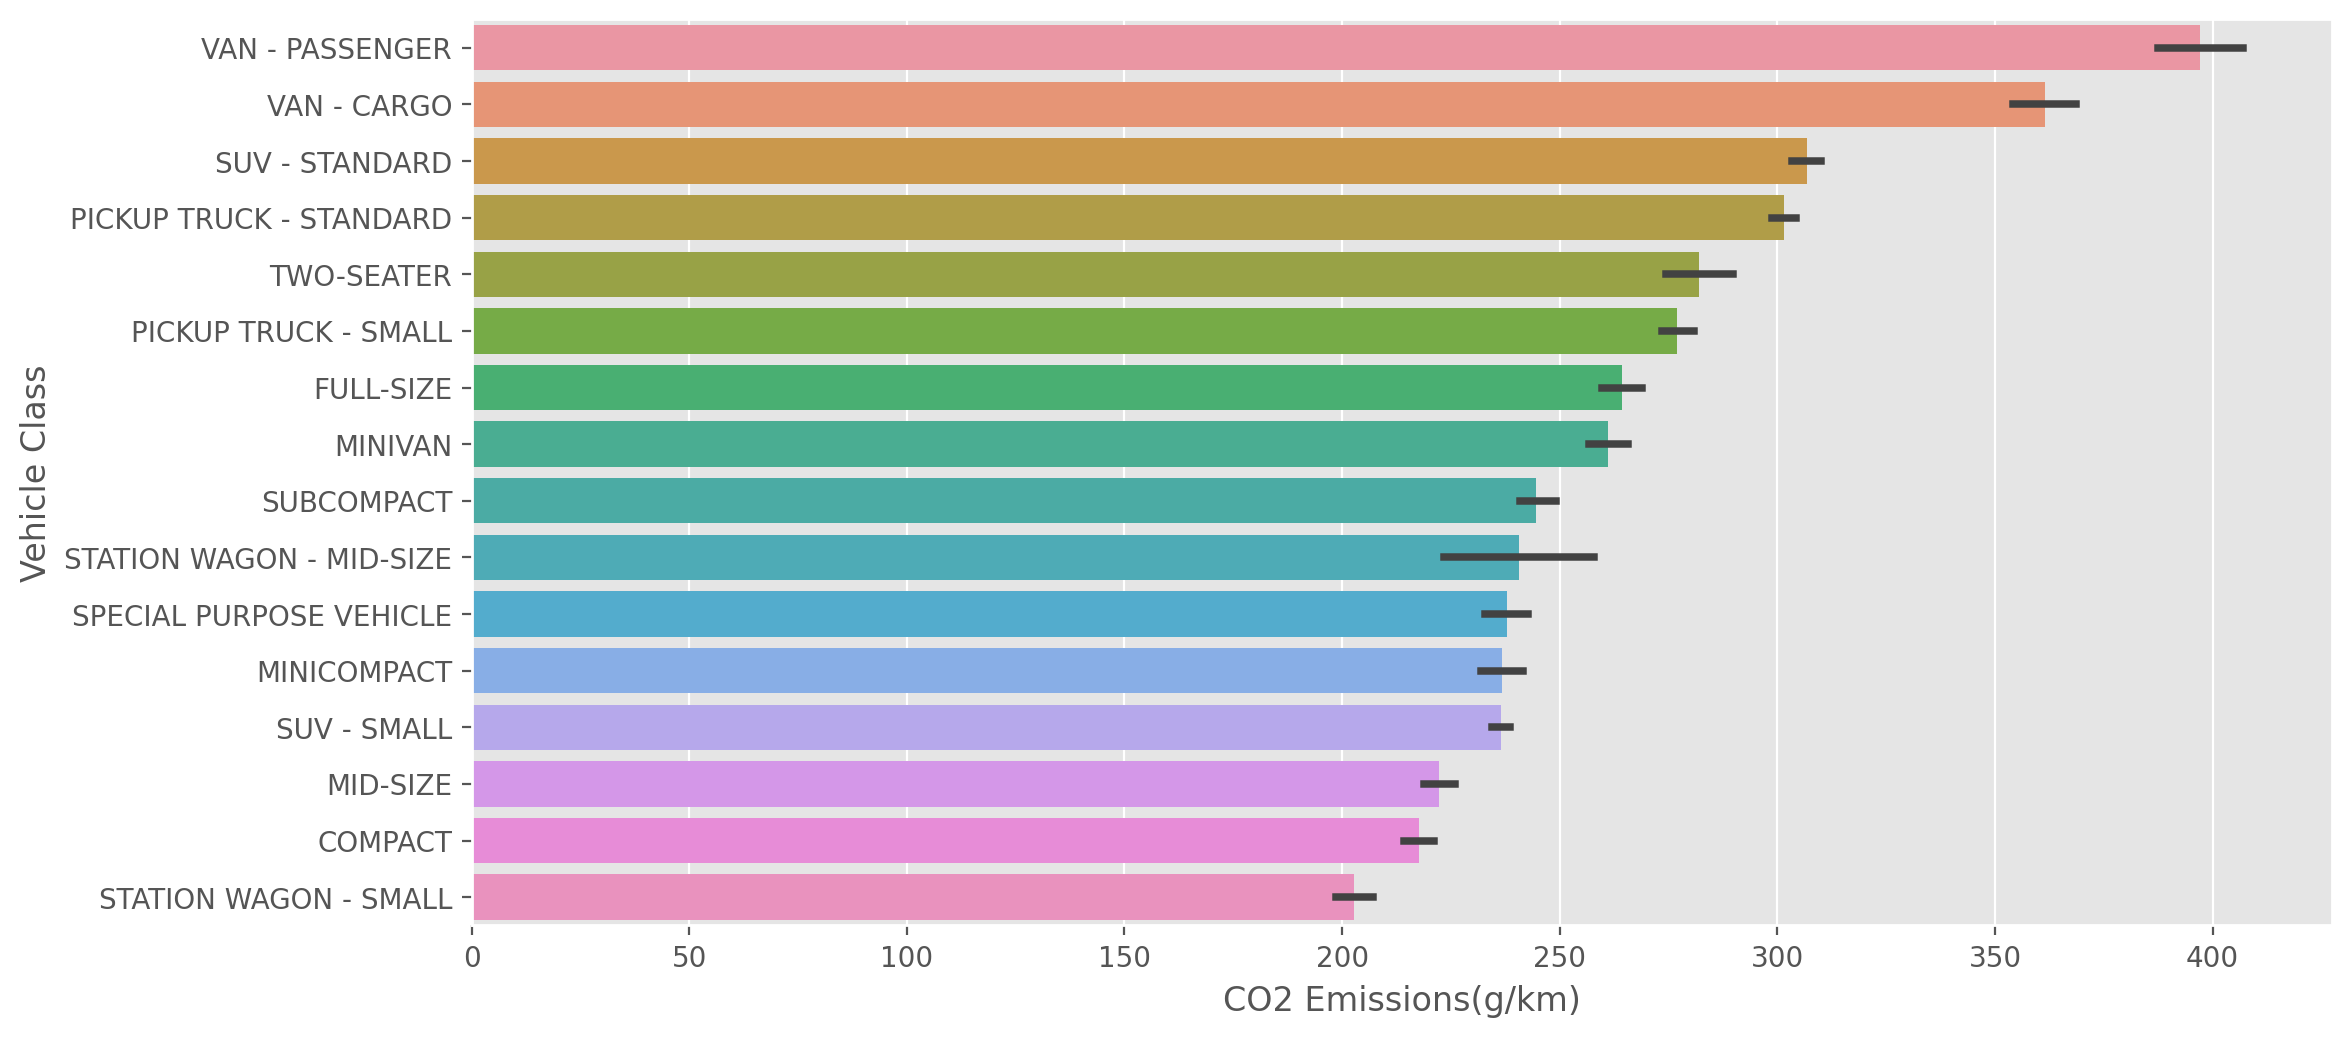

In [21]:
order = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data, order = order)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

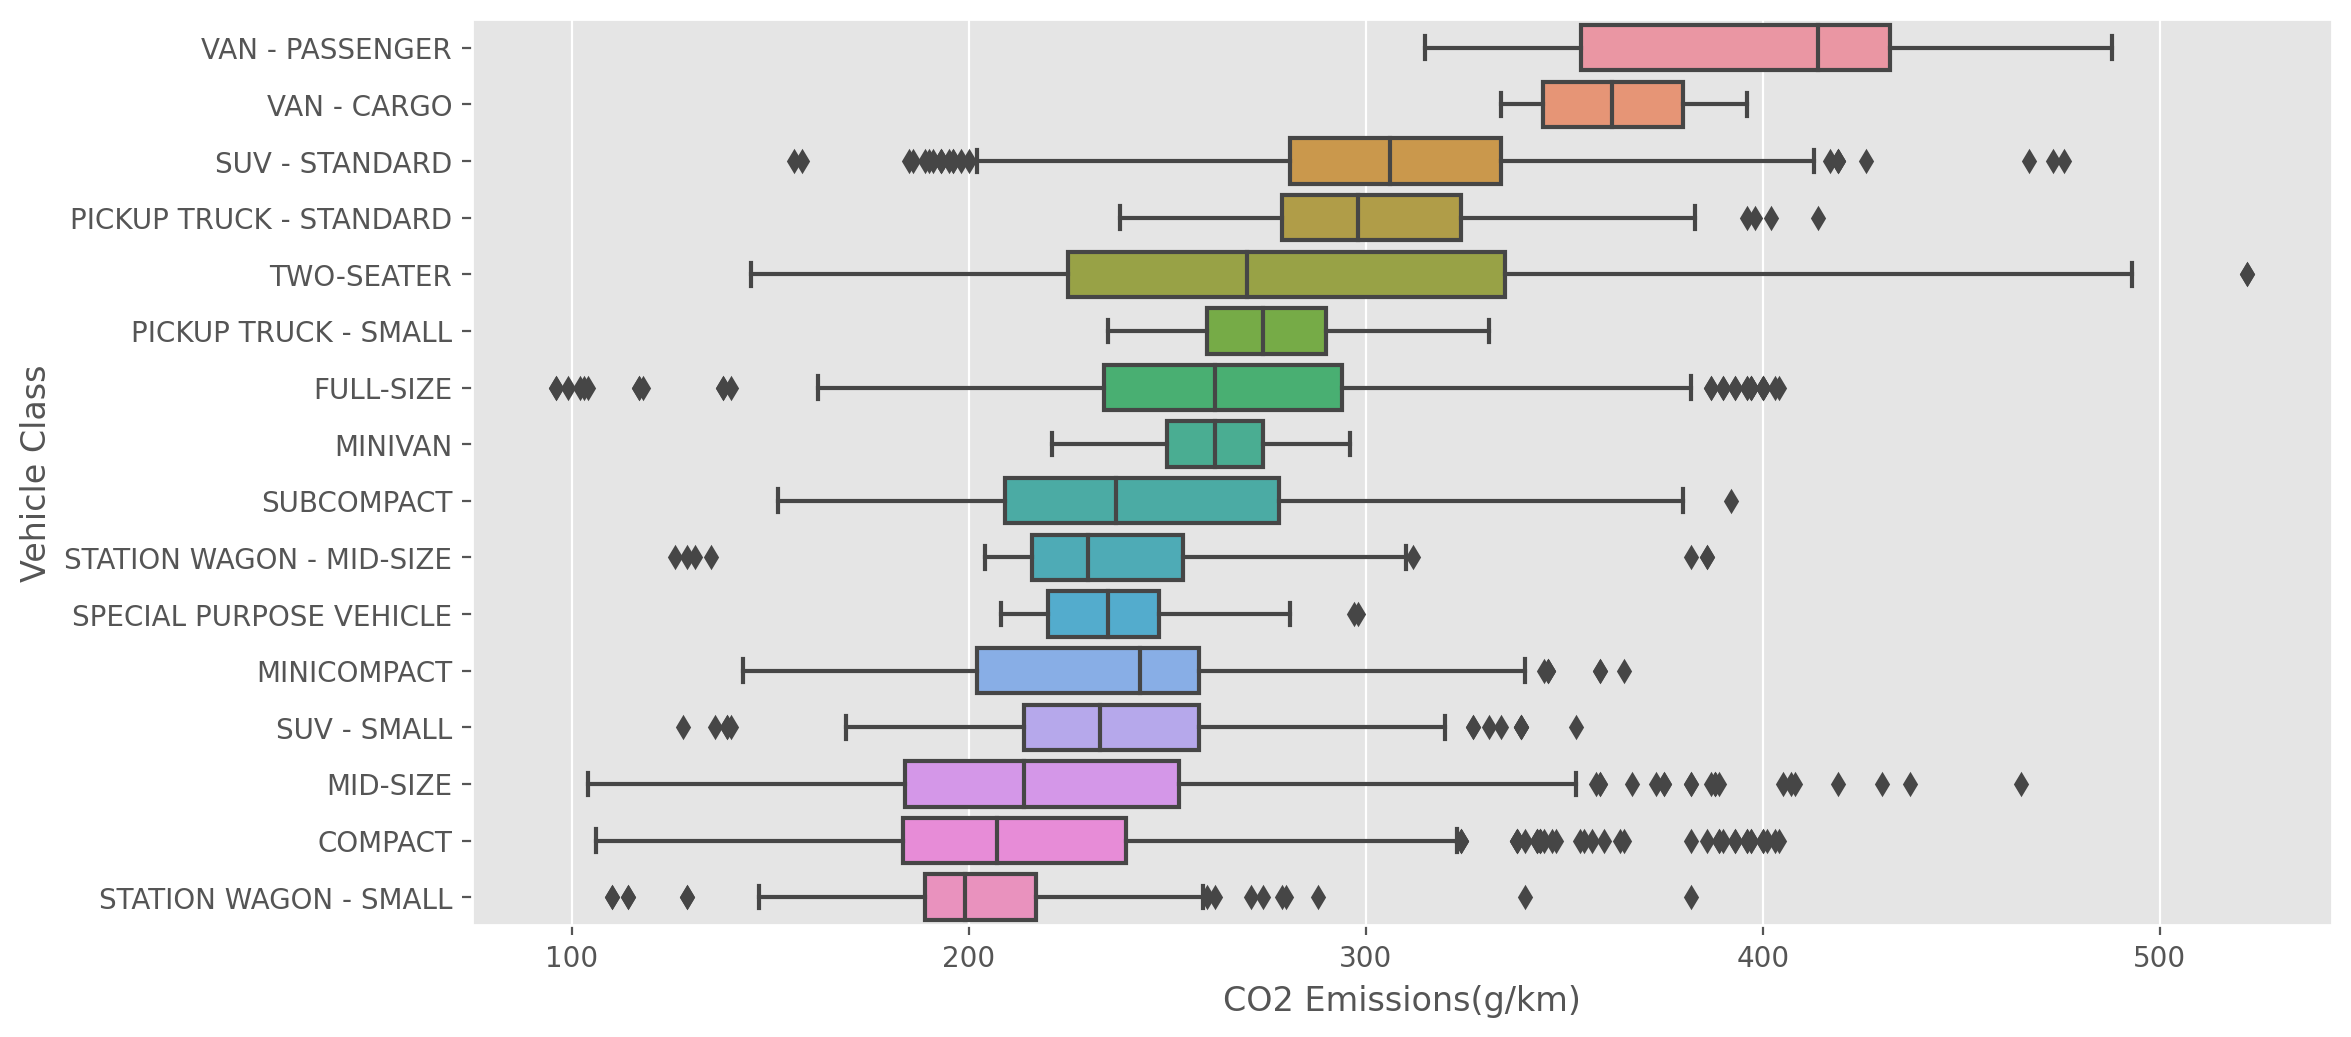

In [22]:
order = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,6), dpi = 200)
sns.boxplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data, order = order)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

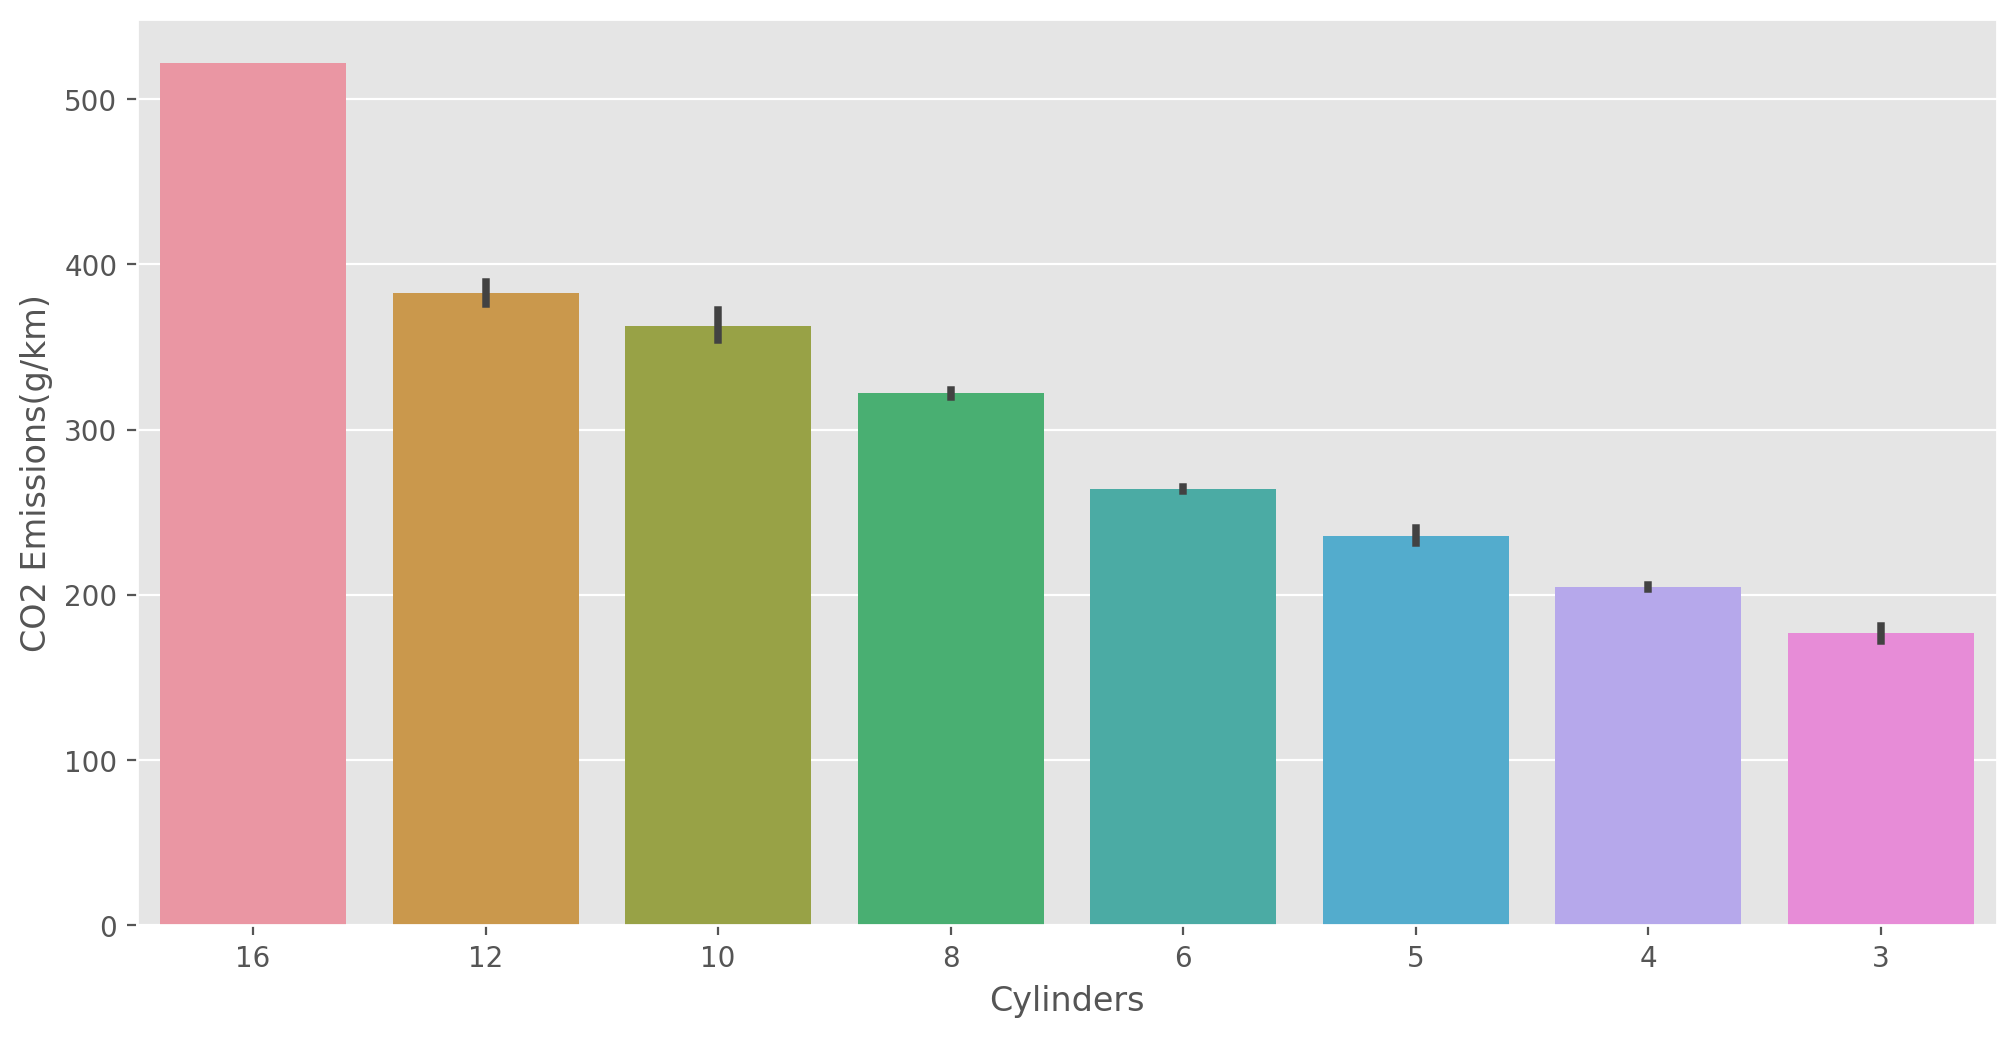

In [23]:
order = data.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot('Cylinders', 'CO2 Emissions(g/km)', data = data, order = order)

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>

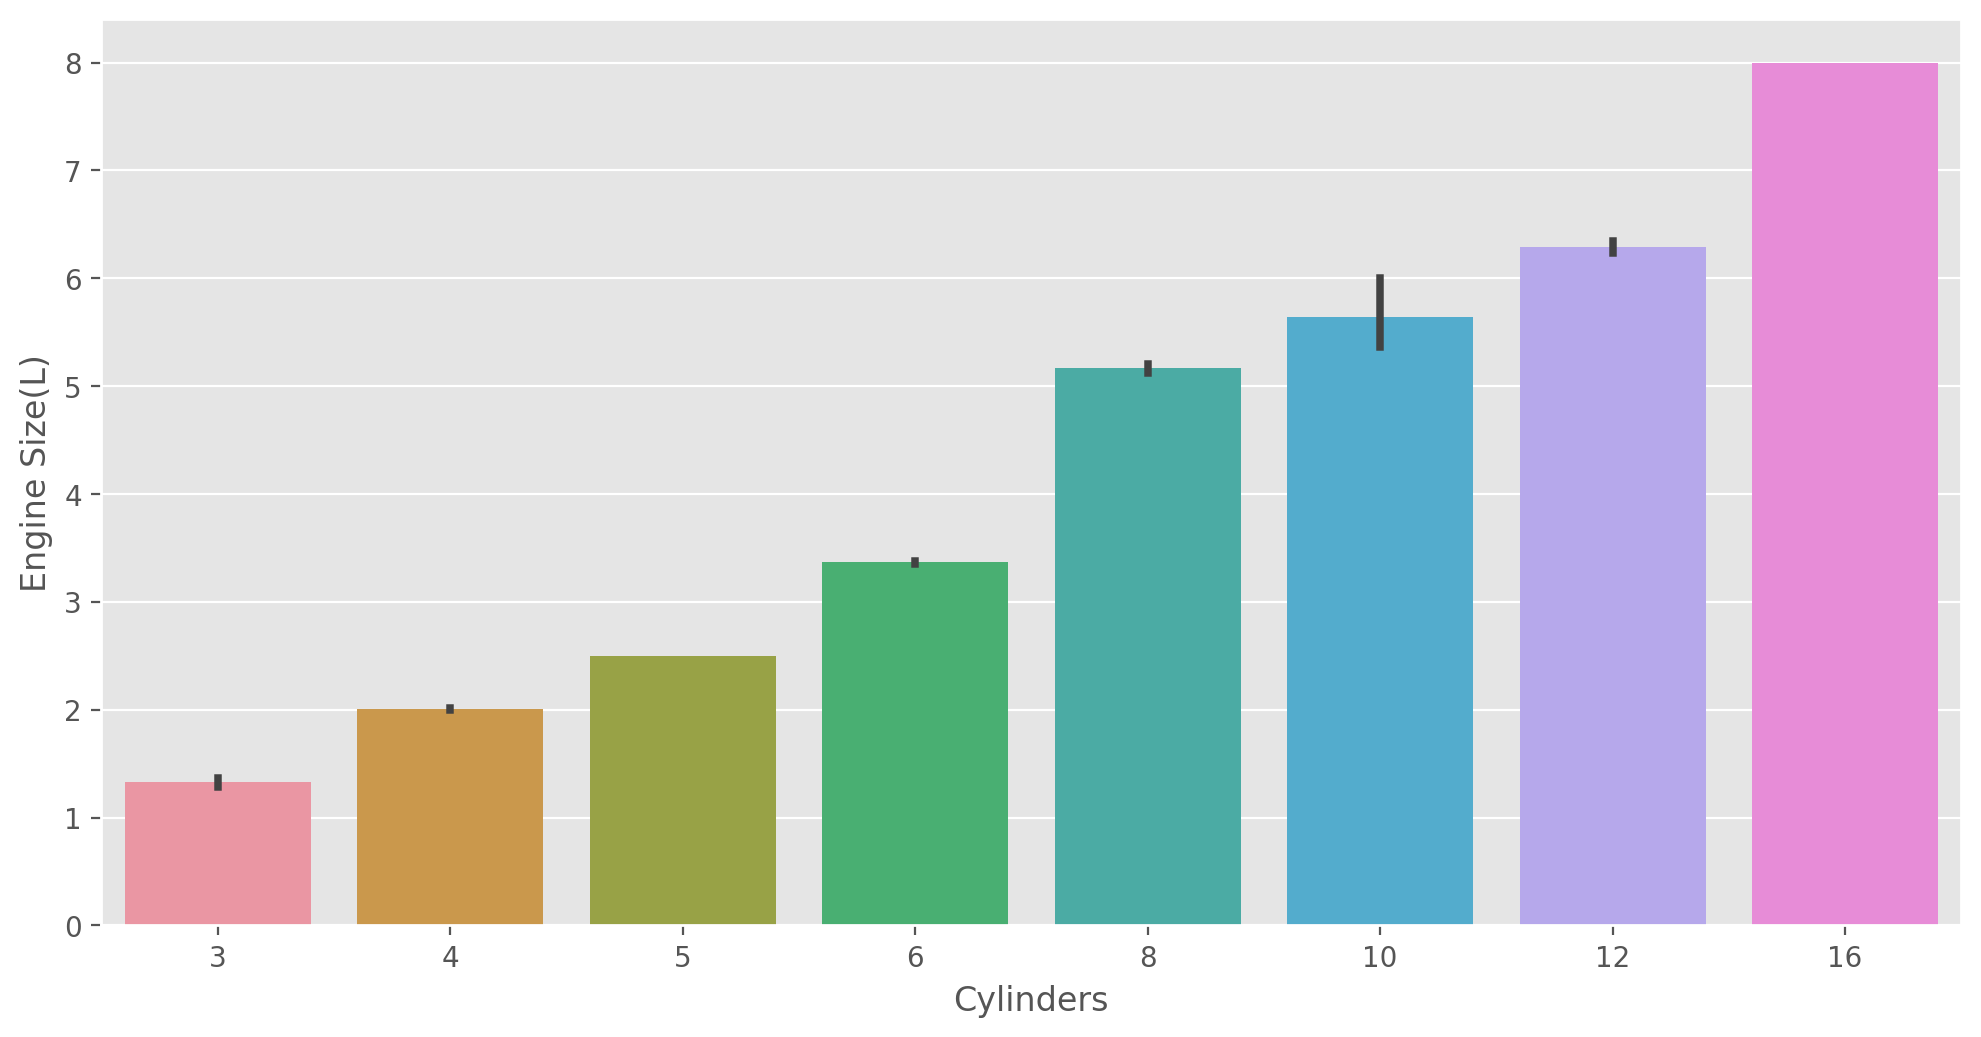

In [24]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot('Cylinders', 'Engine Size(L)', data = data)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

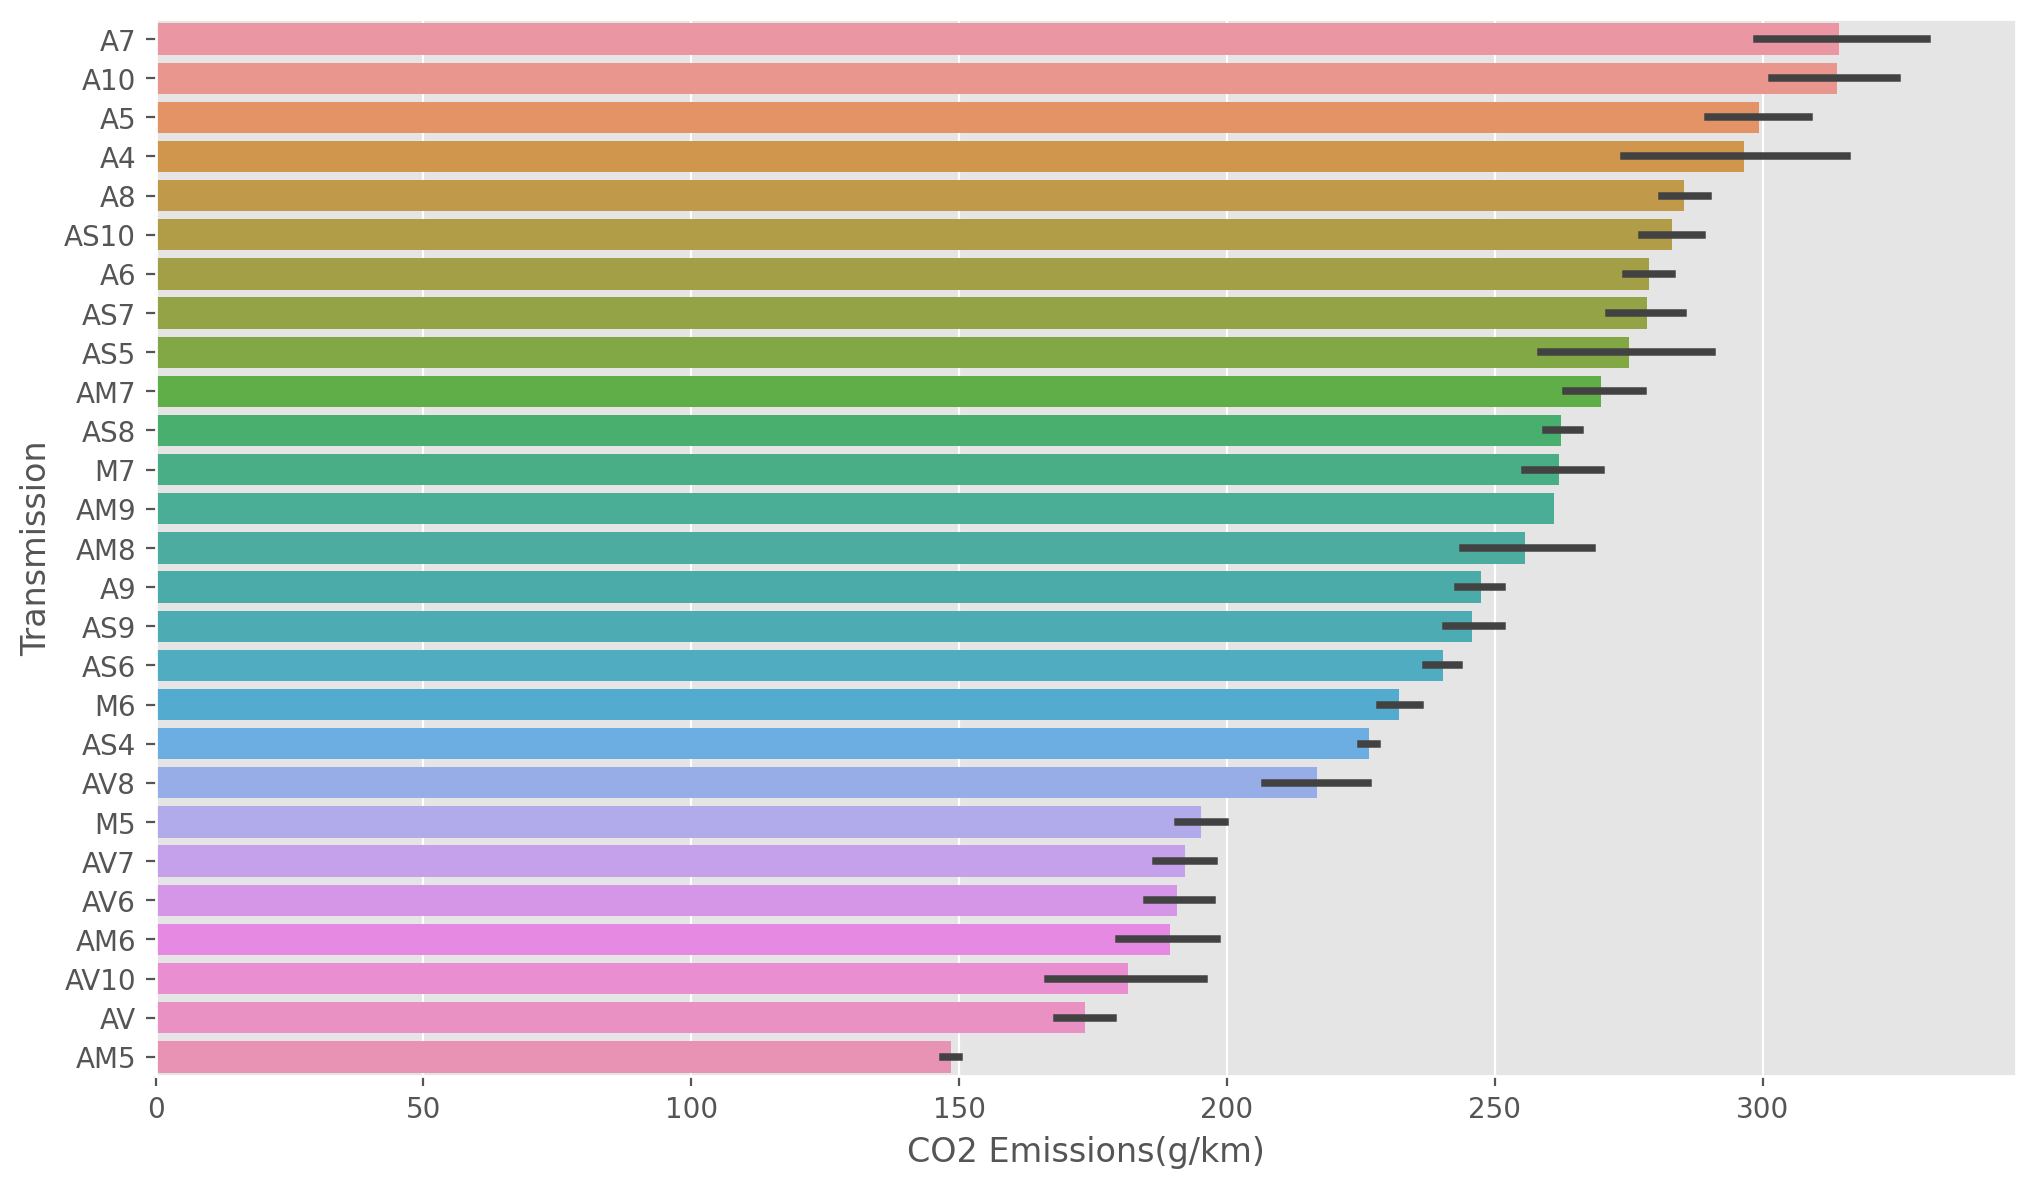

In [25]:
order = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (12,7), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Transmission', data = data, order = order)

<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

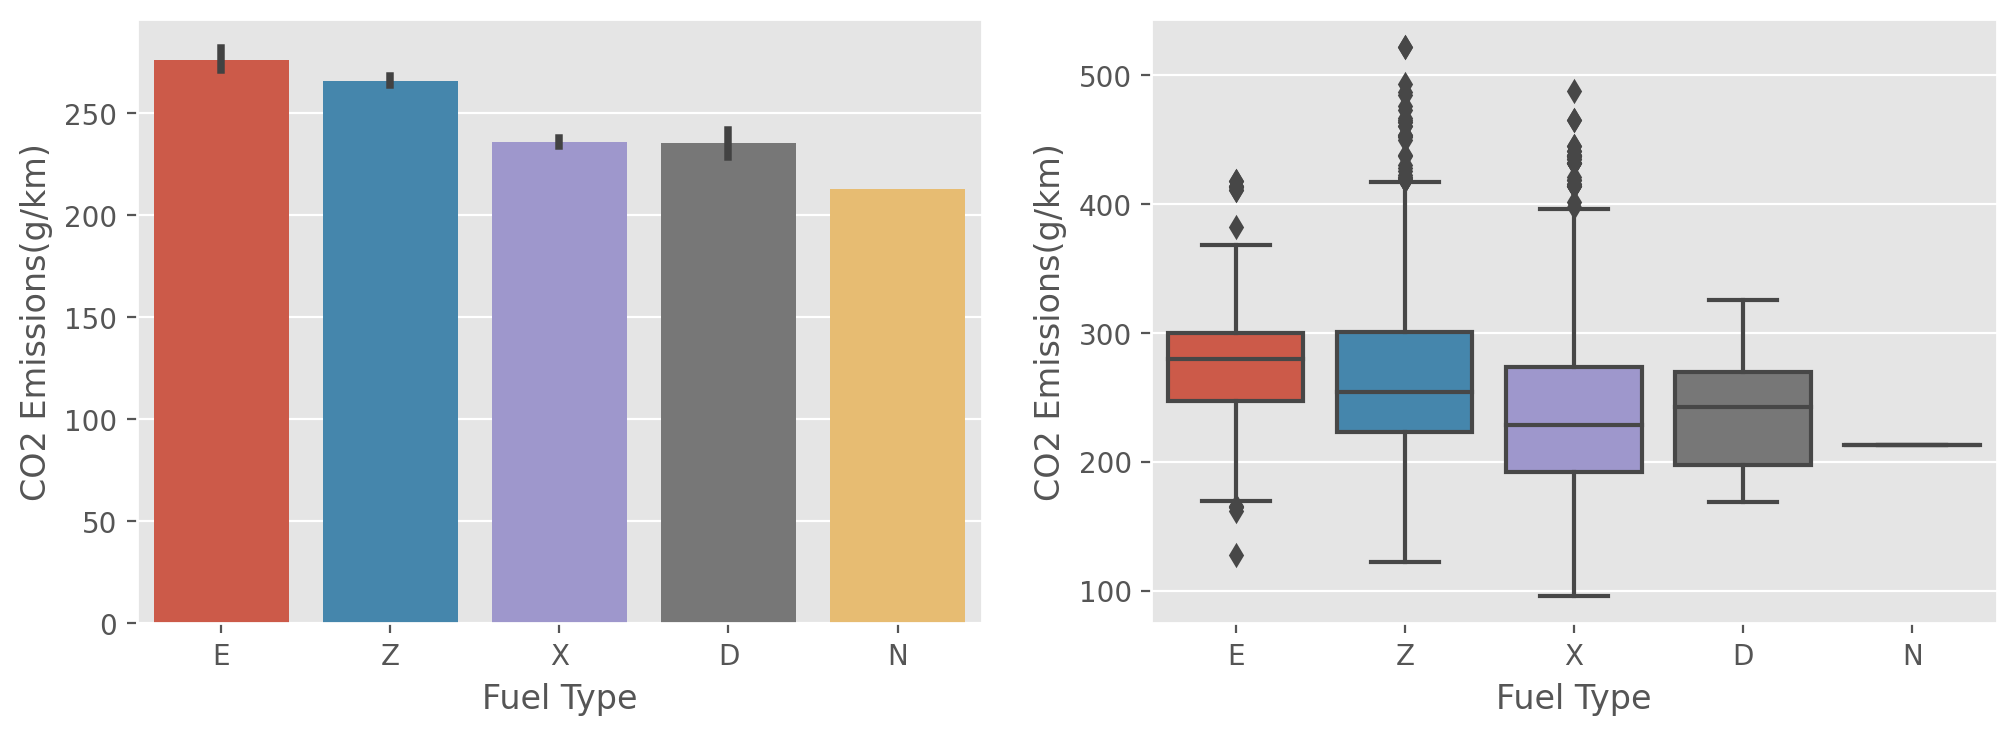

In [26]:
order = data.groupby('Fuel Type').mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Fuel Type', 'CO2 Emissions(g/km)', data = data, order = order)

plt.subplot(1,2,2)
sns.boxplot('Fuel Type', 'CO2 Emissions(g/km)', data = data, order = order)

In [27]:
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


<AxesSubplot:>

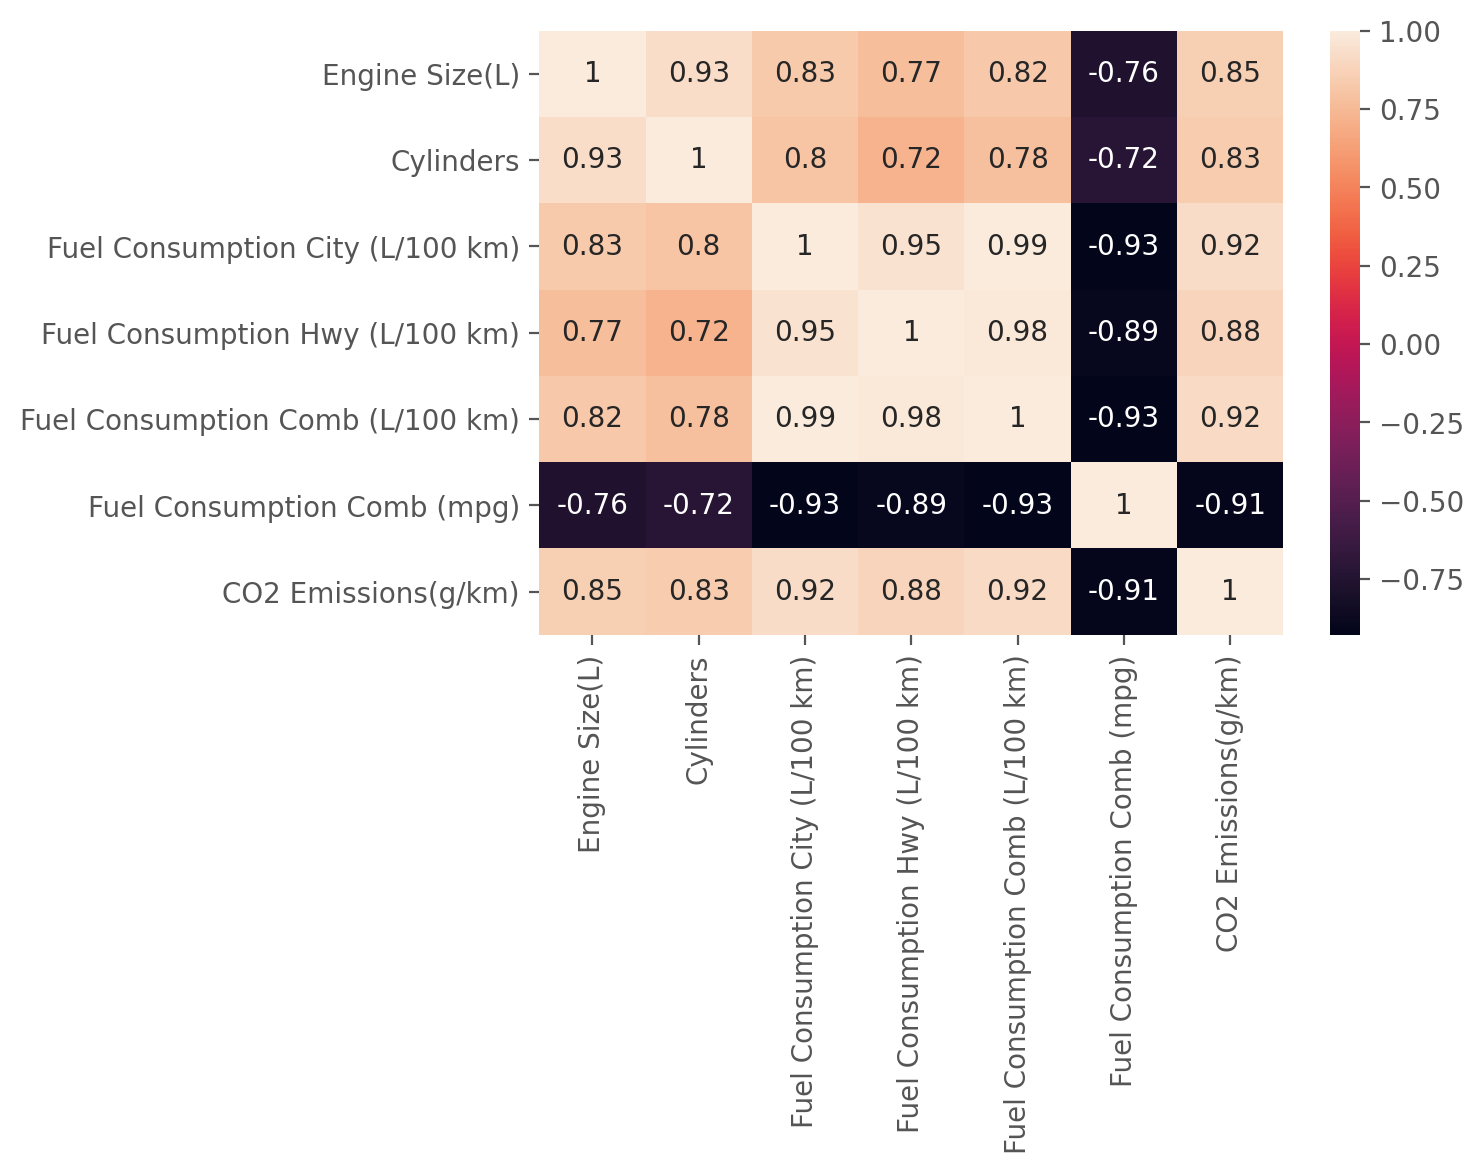

In [28]:
plt.figure(dpi = 200)
sns.heatmap(data.corr(), annot = True)

# --------------------------------------------------------------------------------

In [29]:
cols = ['Vehicle Class', 'Transmission', 'Fuel Type', 'Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]

In [30]:
print('Independent features shape : ', X.shape)
print('Dependent feature shape    : ', Y.shape)

Independent features shape :  (6282, 6)
Dependent feature shape    :  (6282, 1)


In [31]:
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,4,2.0,8.5
1,COMPACT,M6,Z,4,2.4,9.6
2,COMPACT,AV7,Z,4,1.5,5.9
3,SUV - SMALL,AS6,Z,6,3.5,11.1
4,SUV - SMALL,AS6,Z,6,3.5,10.6
5,MID-SIZE,AS6,Z,6,3.5,10.0
6,MID-SIZE,AS6,Z,6,3.5,10.1
7,MID-SIZE,AS6,Z,6,3.7,11.1
8,MID-SIZE,M6,Z,6,3.7,11.6
9,COMPACT,AS5,Z,4,2.4,9.2


In [32]:
Y.head(10)

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

cols = ['Vehicle Class', 'Transmission', 'Fuel Type']
X[cols] = encoder.fit_transform(X[cols])

X.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,4,2.0,8.5
1,0.0,25.0,4.0,4,2.4,9.6
2,0.0,22.0,4.0,4,1.5,5.9
3,11.0,15.0,4.0,6,3.5,11.1
4,11.0,15.0,4.0,6,3.5,10.6


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [35]:
print('Training Data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (4397, 6)
Training labels Shape :  (4397, 1)
Testing Data shape    :  (1885, 6)
Testing labels shape  :  (1885, 1)


In [39]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 4)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [40]:
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.9920001624760755
Testng Set Score   :  0.9819566773996553
